# Importando as libs

In [25]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from pandas_datareader import data as pdr
from matplotlib.dates import DateFormatter
from datetime import date
import yfinance

In [47]:
# Configuração do seaborn
plt.rcParams['figure.figsize'] = [17, 9]
dic = {'grid.color': '#bdbdbd',
       'axes.grid': True,
       'axes.labelcolor': '#D3D3D3',
       'text.color': '#939393', # Cor do titulo
        'xtick.color': '#bdbdbd', # Cor dos ticks do eixo x
        'ytick.color': '#bdbdbd', # Cor dos ticks do eixo y
        'axes.edgecolor': 'bdbdbd',
        'font.sans-serif': ['Arial'], # Fonte
        'font.family': ['Arial'], # Fonte
        'grid.linestyle': '-'} 
sns.set_style(style="whitegrid",rc = dic)

# Extraindo os dados

In [26]:
yfinance.pdr_override()

In [27]:
data_inicial = "2001-12-31"
data_final = "2022-12-31"
# Extraindo os dados do indice Ibovespa
ibov = pdr.get_data_yahoo("^BVSP", data_inicial, data_final)
ibov = ibov.reset_index()

[*********************100%%**********************]  1 of 1 completed


In [28]:
# Renomeando as colunas do df do ibov
ibov.columns = ['data', 'fechamento_ibov', 'abertura_ibov', 'maxima_ibov', 'minina_ibov_a', 'minima_ibov',	'volume_ibov']

In [29]:
# Lendo o csv com a cotação do dolar e ajustando as colunas
dolar = pd.read_csv('usd_brl.csv', sep=',')
dolar['data'] = pd.to_datetime(dolar['data'], format='%d.%m.%Y')
dolar['ultimo'] = dolar['ultimo'].str.replace(',', '.')
dolar['fechamento_dolar'] = dolar['ultimo'].astype(float)
dolar['abertura'] = dolar['abertura'].str.replace(',', '.')
dolar['abertura_dolar'] = dolar['abertura'].astype(float)
dolar['maxima'] = dolar['maxima'].str.replace(',', '.')
dolar['maxima_dolar'] = dolar['maxima'].astype(float)
dolar['minima'] = dolar['minima'].str.replace(',', '.')
dolar['minima_dolar'] = dolar['minima'].astype(float)
dolar['volume_dolar'] = dolar['volume'].str.replace(',', '.')
dolar = dolar[['data','fechamento_dolar', 'abertura_dolar', 'maxima_dolar', 'minima_dolar']]

In [61]:
# Unindo os dois dataframes
df1 = pd.merge(ibov, dolar, on='data', how='inner')
df1 = df1[['data', 'fechamento_ibov', 'abertura_ibov', 'maxima_ibov', 'minima_ibov', 'fechamento_dolar', 'abertura_dolar', 'maxima_dolar', 'minima_dolar']]
df1 = df1[['data', 'fechamento_ibov', 'fechamento_dolar']]

In [69]:
df1.describe()

,data,fechamento_ibov,fechamento_dolar
count,5199,5199.000000,5199.000000
mean,2012-06-29 06:38:00.900172800,59378.230044,2.979819
min,2002-01-02 00:00:00,8397.000000,1.538300
25%,2007-03-26 12:00:00,39944.000000,2.041850
50%,2012-06-28 00:00:00,56822.000000,2.716000
75%,2017-09-27 12:00:00,72204.000000,3.677150
max,2022-12-29 00:00:00,130776.000000,5.885600
std,NaN,29328.771439,1.156837


## Analisando o periodo eleitoral de 2002, 2006, 2010 e 2014

In [87]:
# Filtrando os dados de 2002-10-01 ate 2002-12-01
df_gov1 = df1[(df1['data'] >= '2002-08-01') & (df1['data'] <= '2002-12-01')]
# Filtrando os dados de 2006-10-01 ate 2006-12-01
df_gov2 = df1[(df1['data'] >= '2006-08-01') & (df1['data'] <= '2006-12-01')]
# Filtrando os dados de 2010-10-01 ate 2010-12-01
df_gov3 = df1[(df1['data'] >= '2010-08-01') & (df1['data'] <= '2010-12-01')]
# Filtrando os dados de 2014-10-01 ate 2014-12-01
df_gov4 = df1[(df1['data'] >= '2014-08-01') & (df1['data'] <= '2014-12-01')]

### Plotando o grafico temporal

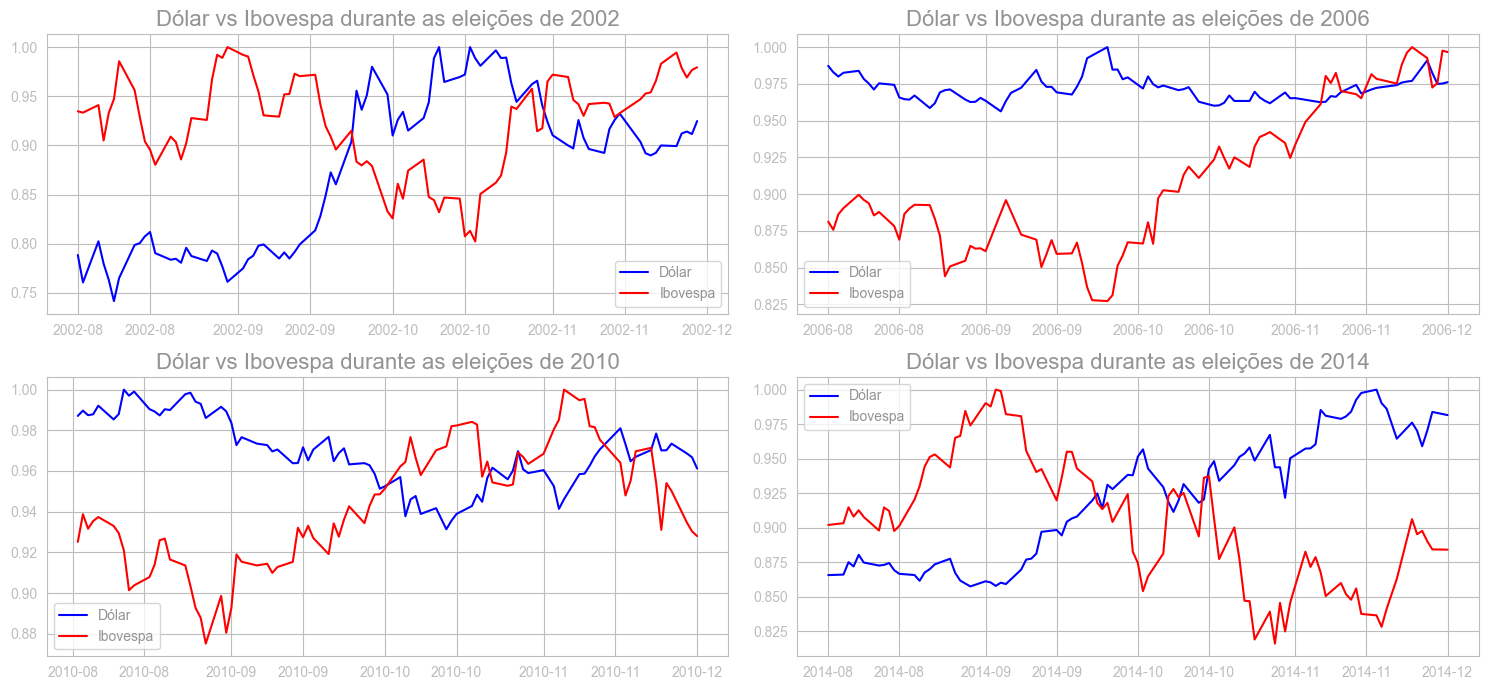

In [89]:
# Criando o gráfico usando o Matplotlib
fig, axs = plt.subplots(2, 2, figsize=(15, 7))
date_format = DateFormatter("%Y-%m")

axs[0,0].plot(df_gov1['data'], (df_gov1['fechamento_dolar'] / df_gov1['fechamento_dolar'].max()), label='Dólar', color='blue')
axs[0,0].plot(df_gov1['data'], (df_gov1['fechamento_ibov'] / df_gov1['fechamento_ibov'].max()), label='Ibovespa', color='red')
axs[0,0].xaxis.set_major_formatter(date_format)
axs[0,0].set_title('Dólar vs Ibovespa durante as eleições de 2002', fontsize=16)
axs[0,0].legend()

axs[0,1].plot(df_gov2['data'], (df_gov2['fechamento_dolar'] / df_gov2['fechamento_dolar'].max()), label='Dólar', color='blue')
axs[0,1].plot(df_gov2['data'], (df_gov2['fechamento_ibov'] / df_gov2['fechamento_ibov'].max()), label='Ibovespa', color='red')
axs[0,1].xaxis.set_major_formatter(date_format)
axs[0,1].set_title('Dólar vs Ibovespa durante as eleições de 2006', fontsize=16)
axs[0,1].legend()

axs[1,0].plot(df_gov3['data'], (df_gov3['fechamento_dolar'] / df_gov3['fechamento_dolar'].max()), label='Dólar', color='blue')
axs[1,0].plot(df_gov3['data'], (df_gov3['fechamento_ibov'] / df_gov3['fechamento_ibov'].max()), label='Ibovespa', color='red')
axs[1,0].xaxis.set_major_formatter(date_format)
axs[1,0].set_title('Dólar vs Ibovespa durante as eleições de 2010', fontsize=16)
axs[1,0].legend()

axs[1,1].plot(df_gov4['data'], (df_gov4['fechamento_dolar'] / df_gov4['fechamento_dolar'].max()), label='Dólar', color='blue')
axs[1,1].plot(df_gov4['data'], (df_gov4['fechamento_ibov'] / df_gov4['fechamento_ibov'].max()), label='Ibovespa', color='red')
axs[1,1].xaxis.set_major_formatter(date_format)
axs[1,1].set_title('Dólar vs Ibovespa durante as eleições de 2014', fontsize=16)
axs[1,1].legend()

plt.tight_layout()
plt.show()

In [91]:
# unindo os dataframes
df_gov1 = df_gov1[['data', 'fechamento_ibov', 'fechamento_dolar']]
df_gov1.columns = ['data', 'fechamento_ibov_2002', 'fechamento_dolar_2002']

df_gov2 = df_gov2[['data', 'fechamento_ibov', 'fechamento_dolar']]
df_gov2.columns = ['data', 'fechamento_ibov_2006', 'fechamento_dolar_2006']

df_gov3 = df_gov3[['data', 'fechamento_ibov', 'fechamento_dolar']]
df_gov3.columns = ['data', 'fechamento_ibov_2010', 'fechamento_dolar_2010']

df_gov4 = df_gov4[['data', 'fechamento_ibov', 'fechamento_dolar']]
df_gov4.columns = ['data', 'fechamento_ibov_2014', 'fechamento_dolar_2014']

df_govs = pd.concat([df_gov1, df_gov2, df_gov3, df_gov4])

### Plotando o grafico de correlação

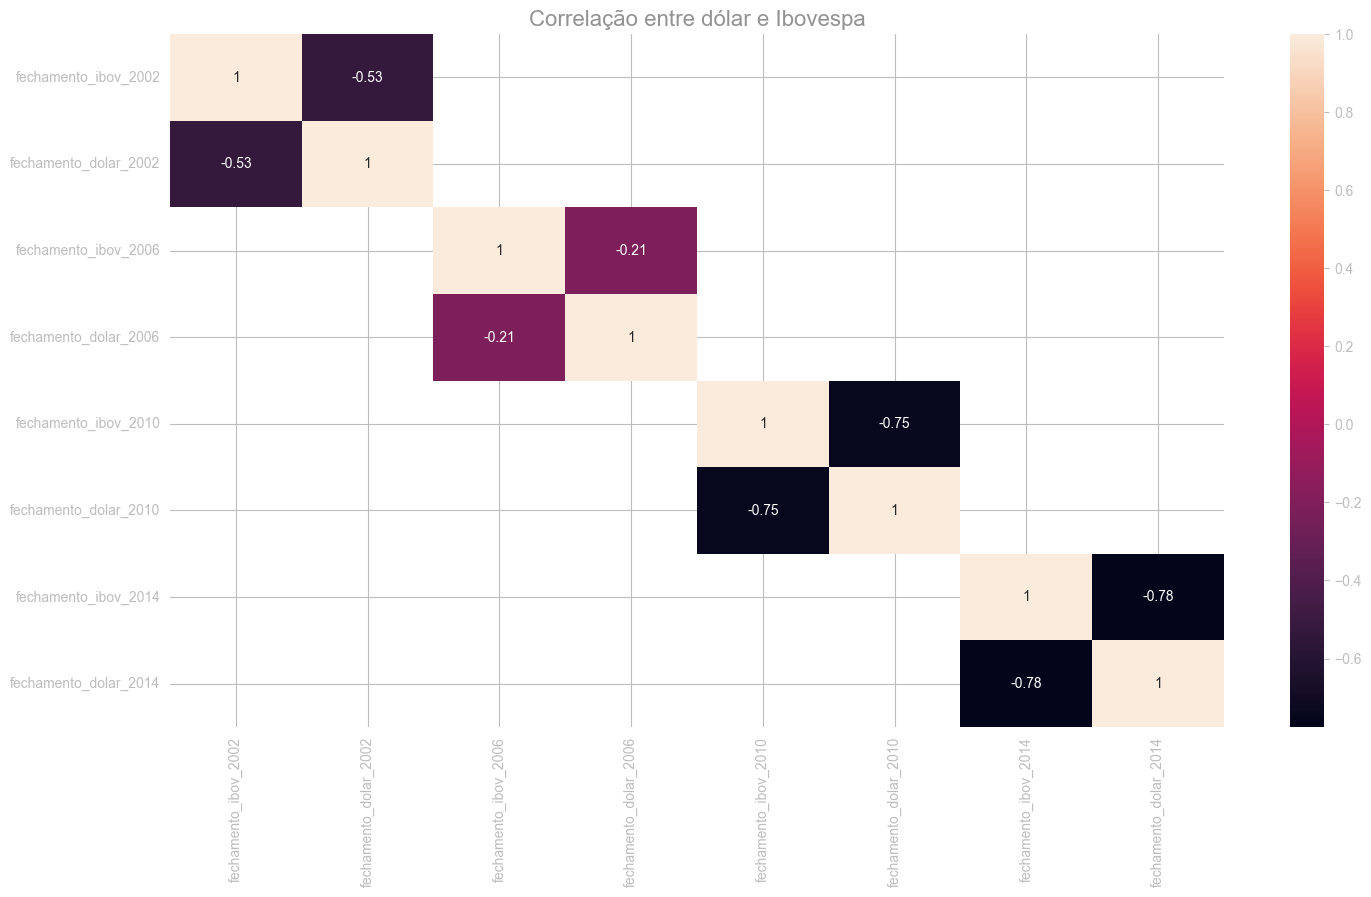

In [92]:
sns.heatmap(df_govs[['fechamento_ibov_2002', 'fechamento_dolar_2002', 'fechamento_ibov_2006', 'fechamento_dolar_2006', 'fechamento_ibov_2010', 'fechamento_dolar_2010', 'fechamento_ibov_2014', 'fechamento_dolar_2014']].corr(), annot=True)
plt.title('Correlação entre dólar e Ibovespa', fontsize=16)
plt.show()

In [35]:
df_govs['data'] = df_govs['data'].dt.strftime('%m-%d')

### Plotando o grafico de dispersao

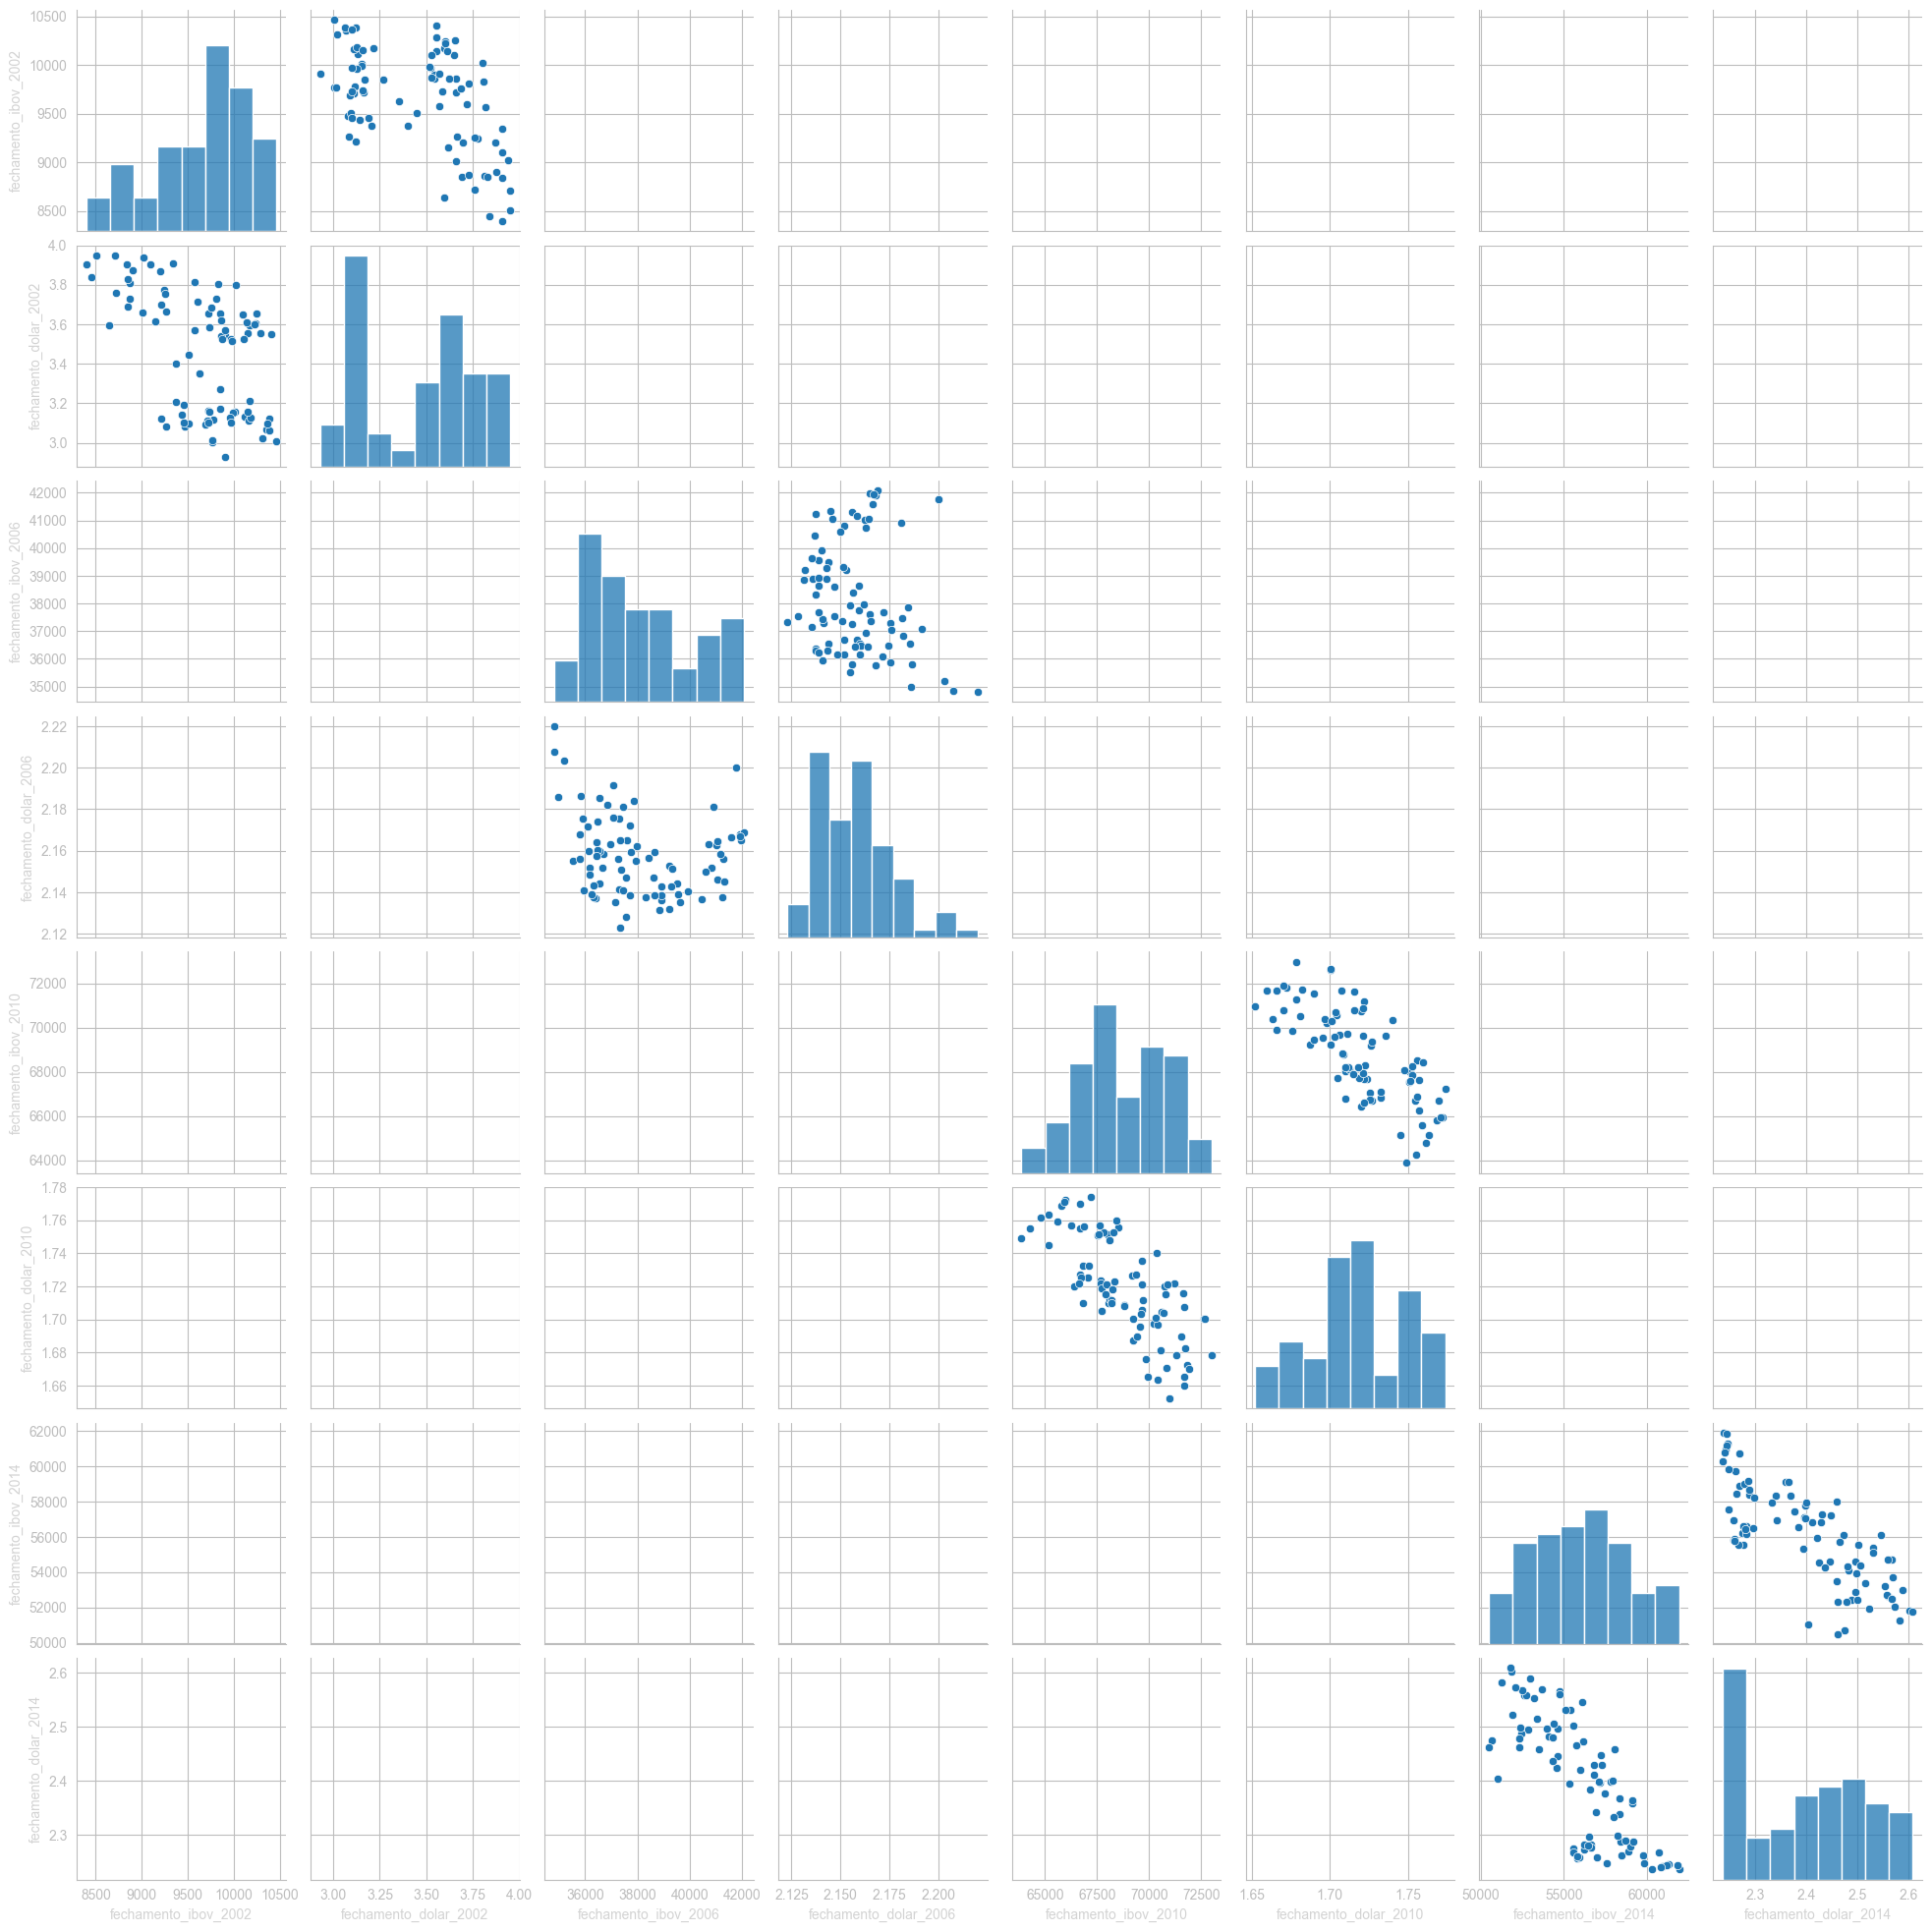

In [93]:
sns.pairplot(df_govs[['fechamento_ibov_2002', 'fechamento_dolar_2002', 'fechamento_ibov_2006', 'fechamento_dolar_2006', 'fechamento_ibov_2010', 'fechamento_dolar_2010', 'fechamento_ibov_2014', 'fechamento_dolar_2014']])
plt.show()

### Analisando os 3 primeiros meses do governo eleito

In [99]:
# Filtrando os dados de 2002-10-01 ate 2002-12-01
df_gov1 = df1[(df1['data'] >= '2003-01-01') & (df1['data'] <= '2003-03-31')]
# Filtrando os dados de 2006-10-01 ate 2006-12-01
df_gov2 = df1[(df1['data'] >= '2006-01-01') & (df1['data'] <= '2007-03-31')]
# Filtrando os dados de 2010-10-01 ate 2010-12-01
df_gov3 = df1[(df1['data'] >= '2010-01-01') & (df1['data'] <= '2011-03-31')]
# Filtrando os dados de 2014-10-01 ate 2014-12-01
df_gov4 = df1[(df1['data'] >= '2014-01-01') & (df1['data'] <= '2015-03-31')]

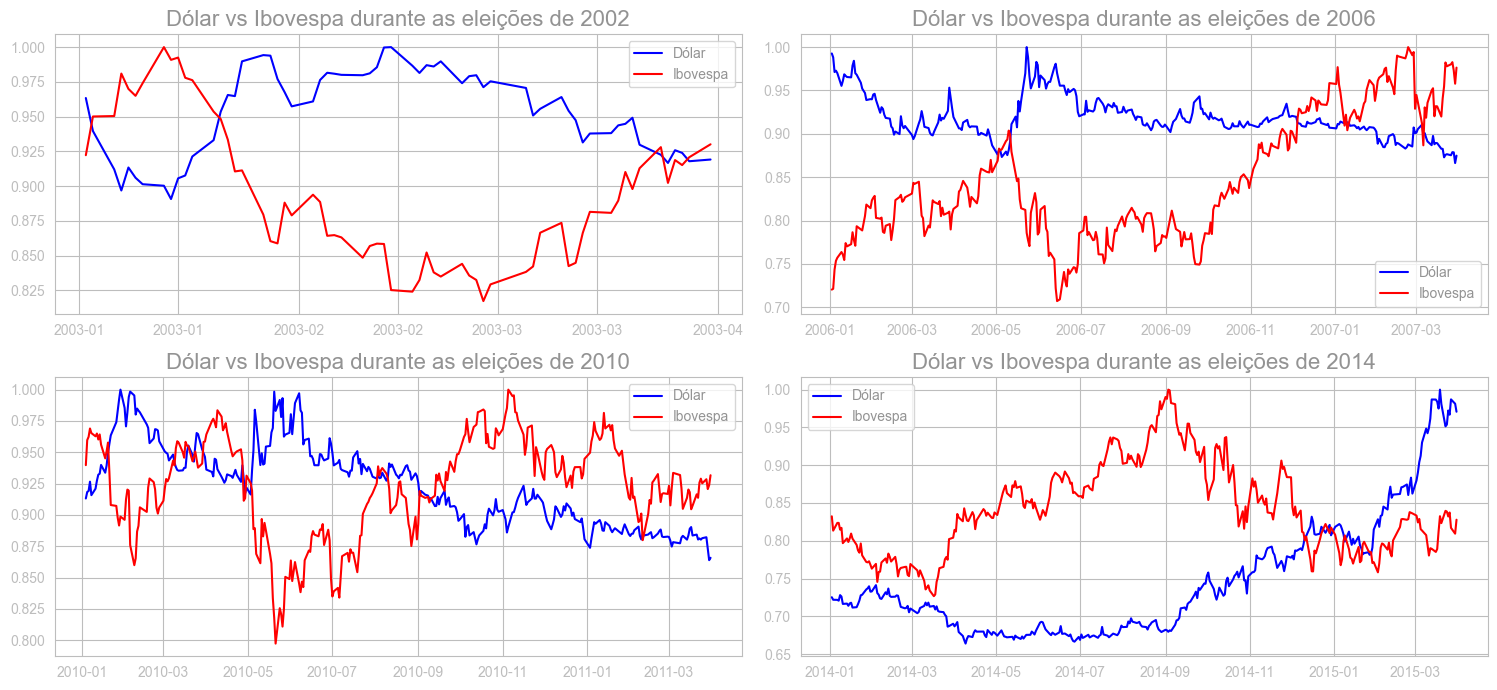

In [100]:
# Criando o gráfico usando o Matplotlib
fig, axs = plt.subplots(2, 2, figsize=(15, 7))
date_format = DateFormatter("%Y-%m")

axs[0,0].plot(df_gov1['data'], (df_gov1['fechamento_dolar'] / df_gov1['fechamento_dolar'].max()), label='Dólar', color='blue')
axs[0,0].plot(df_gov1['data'], (df_gov1['fechamento_ibov'] / df_gov1['fechamento_ibov'].max()), label='Ibovespa', color='red')
axs[0,0].xaxis.set_major_formatter(date_format)
axs[0,0].set_title('Dólar vs Ibovespa durante as eleições de 2002', fontsize=16)
axs[0,0].legend()

axs[0,1].plot(df_gov2['data'], (df_gov2['fechamento_dolar'] / df_gov2['fechamento_dolar'].max()), label='Dólar', color='blue')
axs[0,1].plot(df_gov2['data'], (df_gov2['fechamento_ibov'] / df_gov2['fechamento_ibov'].max()), label='Ibovespa', color='red')
axs[0,1].xaxis.set_major_formatter(date_format)
axs[0,1].set_title('Dólar vs Ibovespa durante as eleições de 2006', fontsize=16)
axs[0,1].legend()

axs[1,0].plot(df_gov3['data'], (df_gov3['fechamento_dolar'] / df_gov3['fechamento_dolar'].max()), label='Dólar', color='blue')
axs[1,0].plot(df_gov3['data'], (df_gov3['fechamento_ibov'] / df_gov3['fechamento_ibov'].max()), label='Ibovespa', color='red')
axs[1,0].xaxis.set_major_formatter(date_format)
axs[1,0].set_title('Dólar vs Ibovespa durante as eleições de 2010', fontsize=16)
axs[1,0].legend()

axs[1,1].plot(df_gov4['data'], (df_gov4['fechamento_dolar'] / df_gov4['fechamento_dolar'].max()), label='Dólar', color='blue')
axs[1,1].plot(df_gov4['data'], (df_gov4['fechamento_ibov'] / df_gov4['fechamento_ibov'].max()), label='Ibovespa', color='red')
axs[1,1].xaxis.set_major_formatter(date_format)
axs[1,1].set_title('Dólar vs Ibovespa durante as eleições de 2014', fontsize=16)
axs[1,1].legend()

plt.tight_layout()
plt.show()

In [96]:
# unindo os dataframes
df_gov1 = df_gov1[['data', 'fechamento_ibov', 'fechamento_dolar']]
df_gov1.columns = ['data', 'fechamento_ibov_2002', 'fechamento_dolar_2002']

df_gov2 = df_gov2[['data', 'fechamento_ibov', 'fechamento_dolar']]
df_gov2.columns = ['data', 'fechamento_ibov_2006', 'fechamento_dolar_2006']

df_gov3 = df_gov3[['data', 'fechamento_ibov', 'fechamento_dolar']]
df_gov3.columns = ['data', 'fechamento_ibov_2010', 'fechamento_dolar_2010']

df_gov4 = df_gov4[['data', 'fechamento_ibov', 'fechamento_dolar']]
df_gov4.columns = ['data', 'fechamento_ibov_2014', 'fechamento_dolar_2014']

df_govs = pd.concat([df_gov1, df_gov2, df_gov3, df_gov4])

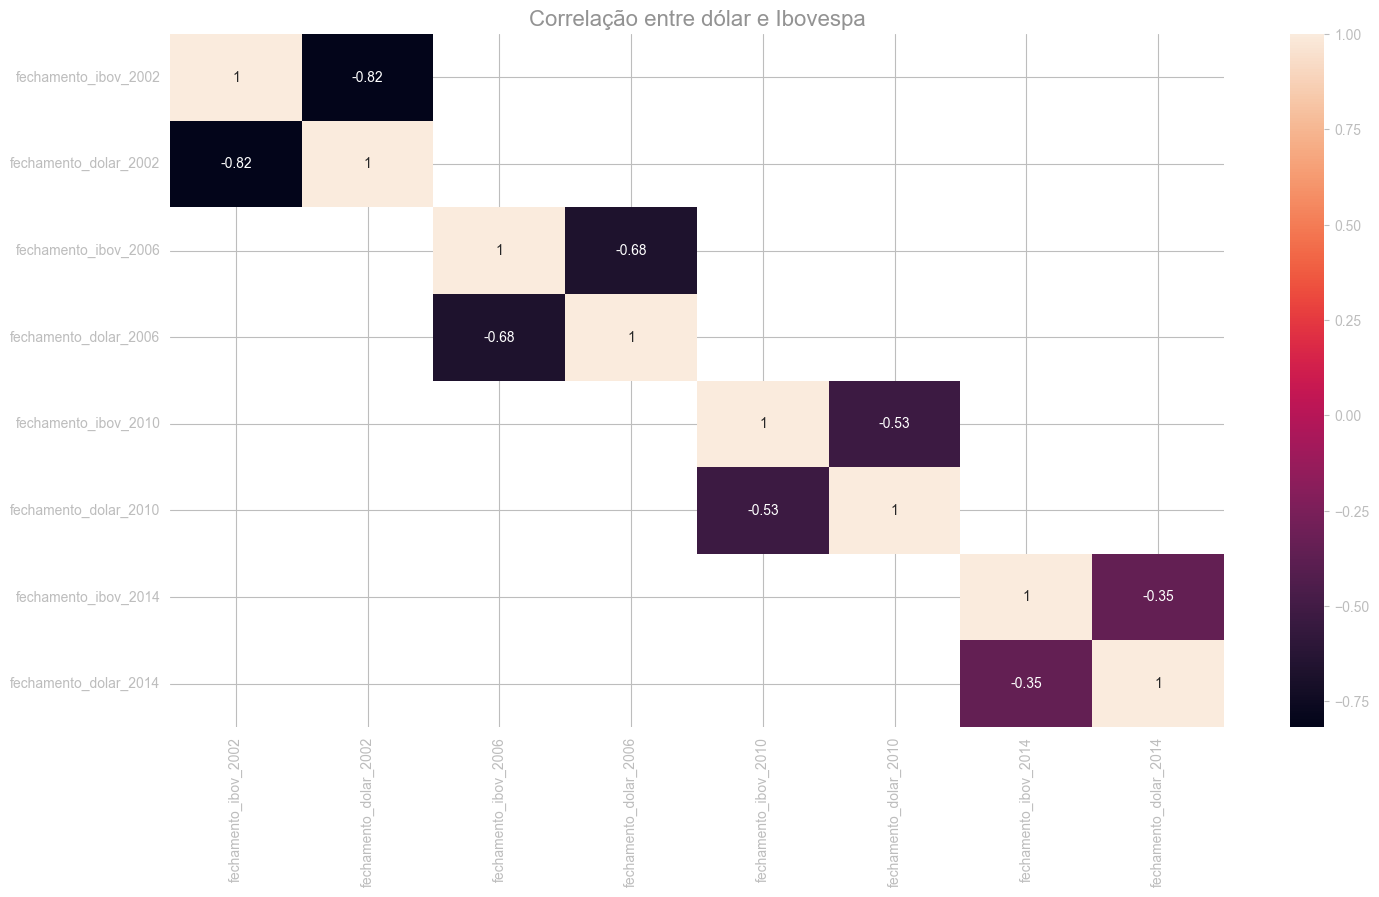

In [97]:
sns.heatmap(df_govs[['fechamento_ibov_2002', 'fechamento_dolar_2002', 'fechamento_ibov_2006', 'fechamento_dolar_2006', 'fechamento_ibov_2010', 'fechamento_dolar_2010', 'fechamento_ibov_2014', 'fechamento_dolar_2014']].corr(), annot=True)
plt.title('Correlação entre dólar e Ibovespa', fontsize=16)
plt.show()

### Analisando os dados do ano seguinte às eleições

In [55]:
# Filtrando os dados de 2002-10-01 ate 2003-01-31
df_2003 = df1[(df1['data'] >= '2003-10-01') & (df1['data'] <= '2004-01-31')]
# Filtrando os dados de 2007-10-01 ate 2008-01-31
df_2007 = df1[(df1['data'] >= '2007-10-01') & (df1['data'] <= '2008-01-31')]
# Filtrando os dados de 2002-10-01 ate 2003-01-31
df_2011 = df1[(df1['data'] >= '2011-10-01') & (df1['data'] <= '2012-01-31')]
# Filtrando os dados de 2015-10-01 ate 2016-01-31
df_2015 = df1[(df1['data'] >= '2015-10-01') & (df1['data'] <= '2016-01-31')]

### Plotando o grafico temporal

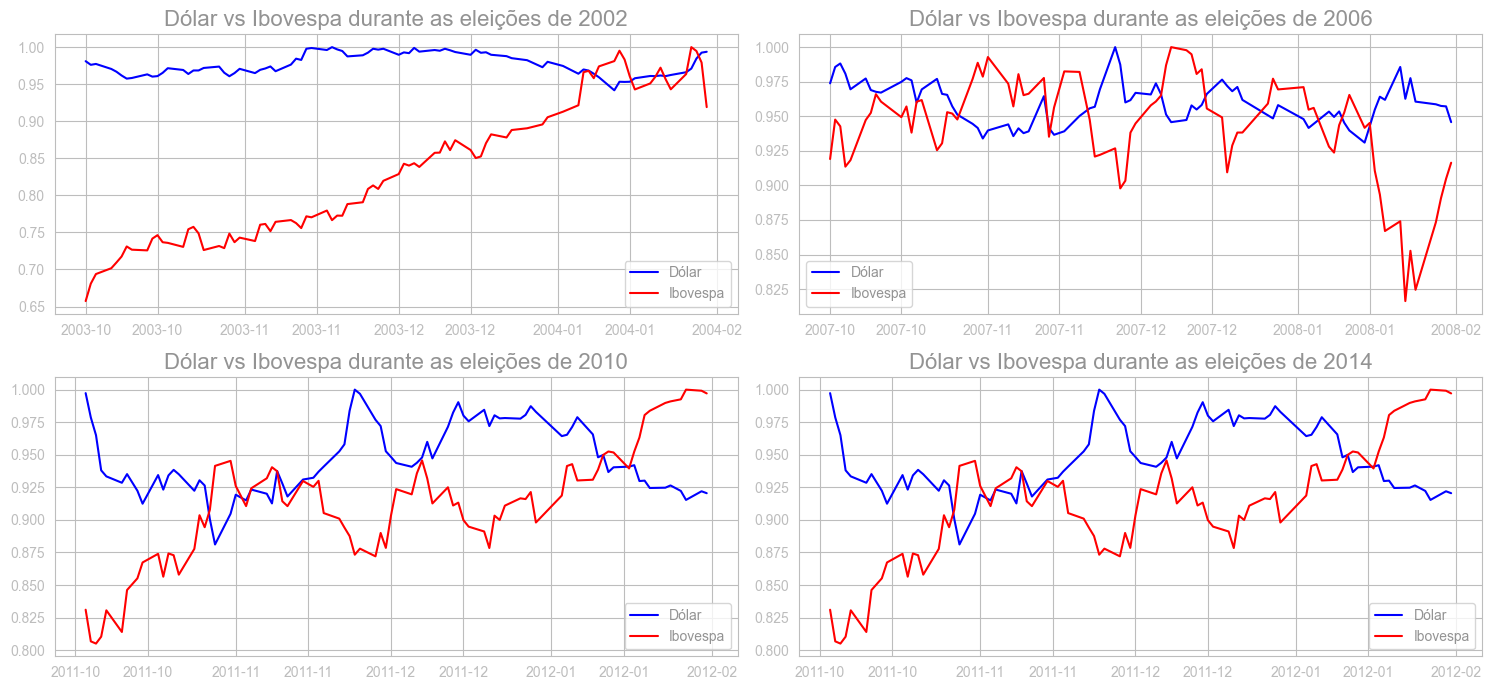

In [56]:
# Crie o gráfico usando o Matplotlib
fig, axs = plt.subplots(2, 2, figsize=(15, 7))
date_format = DateFormatter("%Y-%m")

axs[0,0].plot(df_2003['data'], (df_2003['fechamento_dolar'] / df_2003['fechamento_dolar'].max()), label='Dólar', color='blue')
axs[0,0].plot(df_2003['data'], (df_2003['fechamento_ibov'] / df_2003['fechamento_ibov'].max()), label='Ibovespa', color='red')
axs[0,0].xaxis.set_major_formatter(date_format)
axs[0,0].set_title('Dólar vs Ibovespa durante as eleições de 2002', fontsize=16)
axs[0,0].legend()

axs[0,1].plot(df_2007['data'], (df_2007['fechamento_dolar'] / df_2007['fechamento_dolar'].max()), label='Dólar', color='blue')
axs[0,1].plot(df_2007['data'], (df_2007['fechamento_ibov'] / df_2007['fechamento_ibov'].max()), label='Ibovespa', color='red')
axs[0,1].xaxis.set_major_formatter(date_format)
axs[0,1].set_title('Dólar vs Ibovespa durante as eleições de 2006', fontsize=16)
axs[0,1].legend()

axs[1,0].plot(df_2011['data'], (df_2011['fechamento_dolar'] / df_2011['fechamento_dolar'].max()), label='Dólar', color='blue')
axs[1,0].plot(df_2011['data'], (df_2011['fechamento_ibov'] / df_2011['fechamento_ibov'].max()), label='Ibovespa', color='red')
axs[1,0].xaxis.set_major_formatter(date_format)
axs[1,0].set_title('Dólar vs Ibovespa durante as eleições de 2010', fontsize=16)
axs[1,0].legend()

axs[1,1].plot(df_2011['data'], (df_2011['fechamento_dolar'] / df_2011['fechamento_dolar'].max()), label='Dólar', color='blue')
axs[1,1].plot(df_2011['data'], (df_2011['fechamento_ibov'] / df_2011['fechamento_ibov'].max()), label='Ibovespa', color='red')
axs[1,1].xaxis.set_major_formatter(date_format)
axs[1,1].set_title('Dólar vs Ibovespa durante as eleições de 2014', fontsize=16)
axs[1,1].legend()

plt.tight_layout()
plt.show()

In [39]:
# unindo os dataframes
df_2003 = df_2003[['data', 'fechamento_ibov', 'fechamento_dolar']]
df_2003.columns = ['data', 'fechamento_ibov_2003', 'fechamento_dolar_2003']

df_2007 = df_2007[['data', 'fechamento_ibov', 'fechamento_dolar']]
df_2007.columns = ['data', 'fechamento_ibov_2007', 'fechamento_dolar_2007']

df_2011 = df_2011[['data', 'fechamento_ibov', 'fechamento_dolar']]
df_2011.columns = ['data', 'fechamento_ibov_2011', 'fechamento_dolar_2011']

df_2015 = df_2015[['data', 'fechamento_ibov', 'fechamento_dolar']]
df_2015.columns = ['data', 'fechamento_ibov_2015', 'fechamento_dolar_2015']

df_pos_govs = pd.concat([df_2003, df_2007, df_2011, df_2015])

### Plotando o grafico de correlação

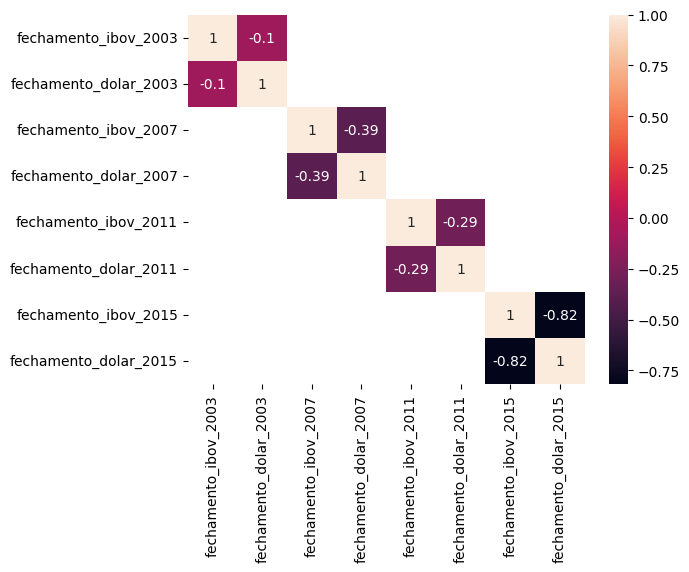

In [40]:
sns.heatmap(df_pos_govs[['fechamento_ibov_2003', 'fechamento_dolar_2003', 'fechamento_ibov_2007', 'fechamento_dolar_2007', 'fechamento_ibov_2011', 'fechamento_dolar_2011', 'fechamento_ibov_2015', 'fechamento_dolar_2015']].corr(), annot=True)
plt.show()

### Plotando o grafico de dispersao

In [41]:
df_pos_govs['data'] = df_pos_govs['data'].dt.strftime('%m-%d')

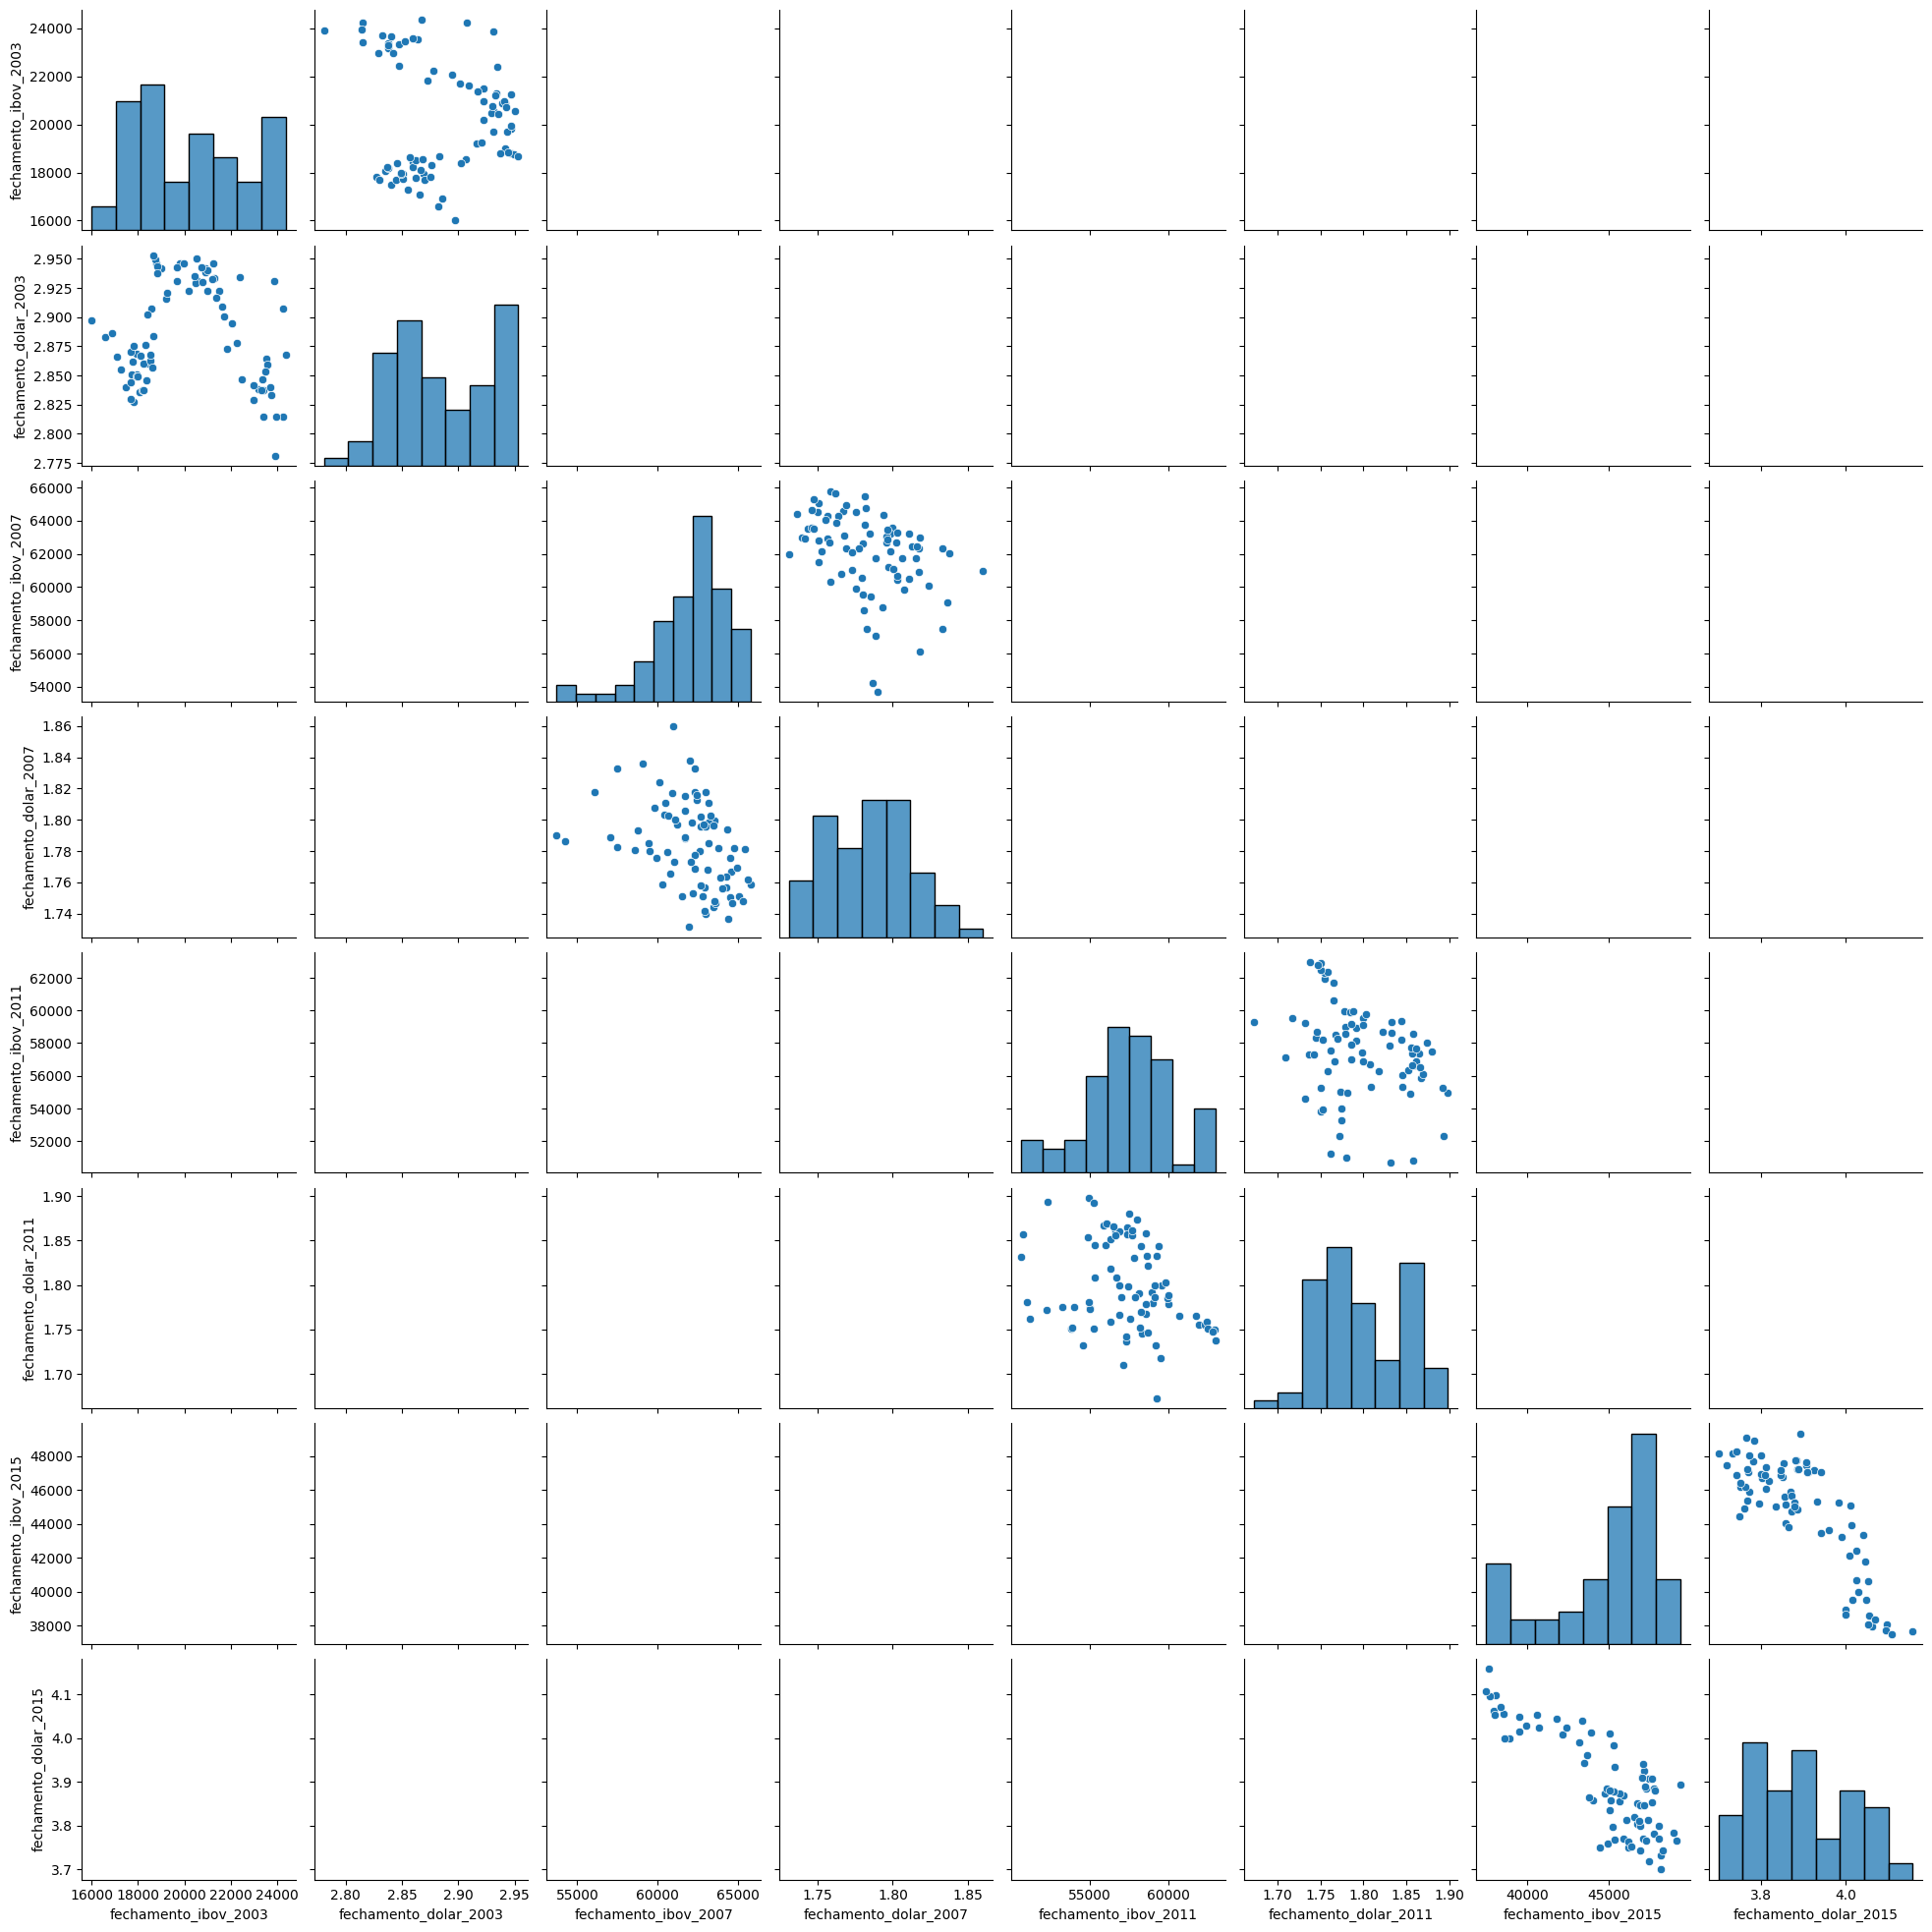

In [42]:
sns.pairplot(df_pos_govs[['fechamento_ibov_2003', 'fechamento_dolar_2003', 'fechamento_ibov_2007', 'fechamento_dolar_2007', 'fechamento_ibov_2011', 'fechamento_dolar_2011', 'fechamento_ibov_2015', 'fechamento_dolar_2015']])
plt.show()

## Analisando os dados da crise de 2008 nos EUA

In [43]:
# Filtrando os dados de 2015-10-01 ate 2016-01-31
df_crise = df1[(df1['data'] >= '2008-01-01') & (df1['data'] <= '2009-01-01')]

### Plotando o grafico temporal

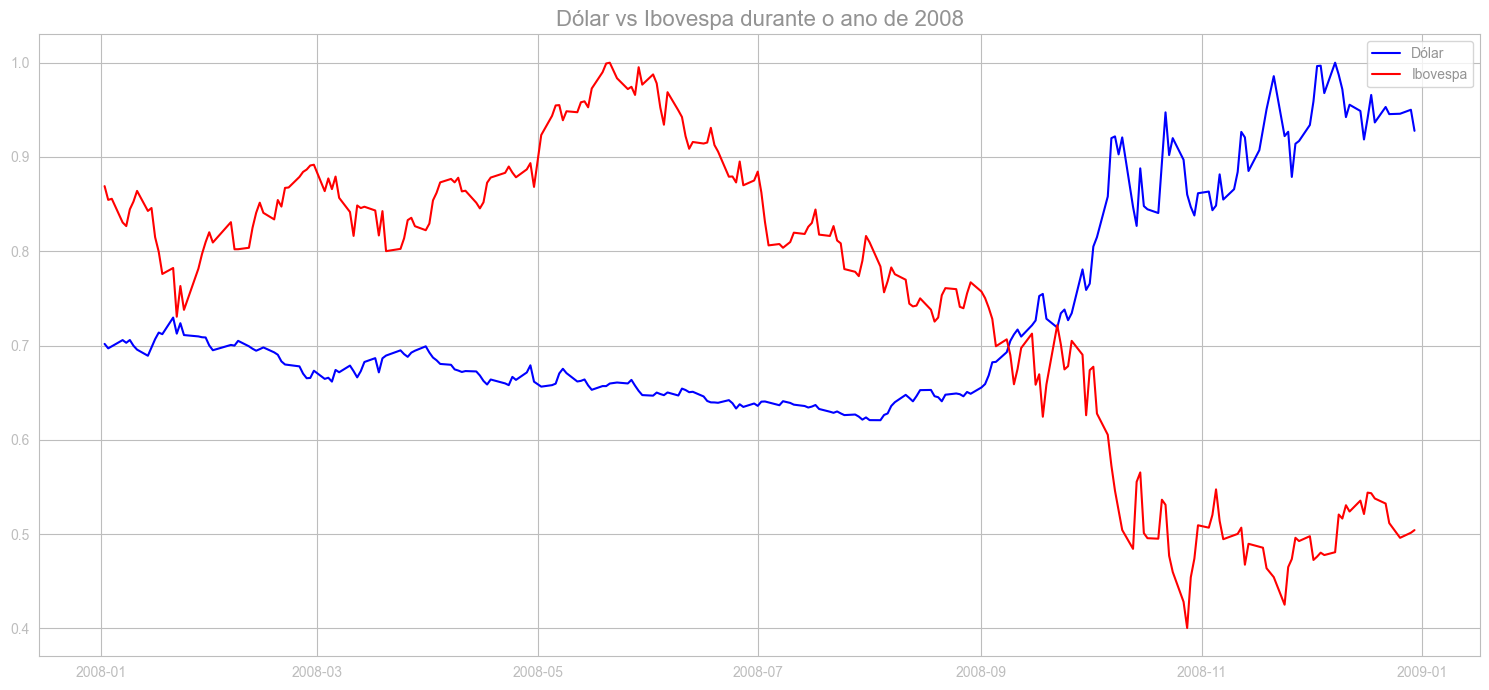

In [58]:
# Crie o gráfico usando o Matplotlib
plt.figure(figsize=(15, 7))
date_format = DateFormatter("%Y-%m")

plt.plot(df_crise['data'], (df_crise['fechamento_dolar'] / df_crise['fechamento_dolar'].max()), label='Dólar', color='blue')
plt.plot(df_crise['data'], (df_crise['fechamento_ibov'] / df_crise['fechamento_ibov'].max()), label='Ibovespa', color='red')
plt.title('Dólar vs Ibovespa durante o ano de 2008', fontsize=16)
plt.legend()

plt.tight_layout()
plt.show()

### Plotando o grafico de correlação

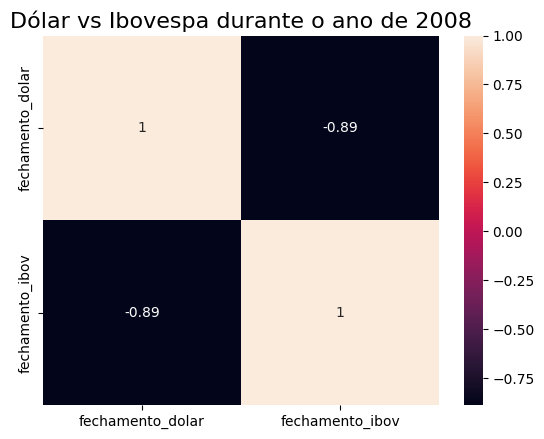

In [45]:
sns.heatmap(df_crise[['fechamento_dolar', 'fechamento_ibov']].corr(), annot=True)
plt.title('Dólar vs Ibovespa durante o ano de 2008', fontsize=16)
plt.show()

### Plotando o grafico de dispersao

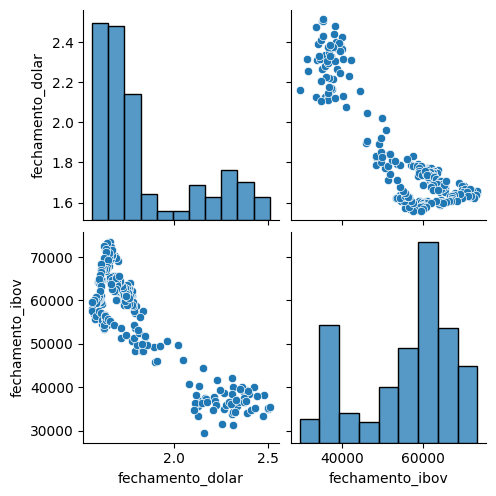

In [46]:
sns.pairplot(df_crise[['fechamento_dolar', 'fechamento_ibov']])
plt.show()

# Regressão Simples

In [ ]:
# Importe as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# Visualize os dados (opcional)
plt.scatter(df1['fechamento_dolar'], df1['fechamento_ibov'], label='Dados de Exemplo')
plt.xlabel('Variável Independente (X)')
plt.ylabel('Variável Dependente (Y)')

# Crie um modelo de regressão linear
regressor = LinearRegression()
x = np.array(df1['fechamento_dolar'])
y = np.array(df1['fechamento_ibov'])

# Ajuste o modelo aos dados
regressor.fit(x.reshape(-1, 1), y.reshape(-1, 1))  # É importante redimensionar x para uma matriz 2D

# Faça previsões com o modelo
x_pred = df1['fechamento_dolar']  # Valores de x para prever
y_pred = regressor.predict(y.reshape(-1, 1))  # Previsões

# Visualize o ajuste do modelo (linha de regressão)
plt.plot(x_pred, y_pred, label='Regressão Linear', color='red')

# Exiba o gráfico
plt.legend()
plt.show()

# Coeficientes da regressão
print(f"Coeficiente (inclinação): {regressor.coef_[0]}")
print(f"Intercepto: {regressor.intercept_}")
